<h1 style="color:green;"> <strong> <center>Tarea 3</center></strong> </h1>
<h4><center>Ariadna Sofía Contreras Abril</center></h4>
<h4><center>Kevin Andrés Leal Perez</center></h4>
<h4><center>Andrés Stiven Garcia Lopez</center></h4>
<h4><center>Universidad Nacional de Colombia</center></h4>
<h4><center>Facultad de Ciencias</center></h4>
<h4><center>Departamento de Estadística</center></h4>

1. Instale localmente en su computadora SQL o MariaDB

<img src=2022-09-15.png>

<img src=2022-09-15(1).png>

2. Instale la base de datos sakila. Siga las instrucciones del cuaderno de Jupyter lab


Se descargan los tres archivos que estaban en el zip, donde se encuentran las declaraciones CREATE necesarias para crear la estructura de la base de datos de Sakila, las instrucciones INSERT necesarias para completar la estructura creada por el archivo sakila-schema.sql junto con las definiciones de los desencadenantes que deben crearse después de la carga de datos inicial y un modelo de datos de MySQL Workbench para examinar la estructura de la base de datos

<img src=2022-09-15(2).png>

Se carga el archivo de sakila schema

<img src=2022-09-16(1).png>

Se carga el archivo sakila data

<img src=2022-09-16(2).png>

Se utiliza el comando USE para poder acceder a la base de datos sakila y posteriormente se muestran las tablas(entidades) que tiene la base de datos. Por último se realizan dos consultan como se indica en el cuaderno de jupyter lab con las instrucciones.

<img src=2022-09-16(4).png>

3. Cree una ambiente de anaconda nuevo, instale Python y Jupyter lab. Agregue la extensión para MariaDB 

Se crea el ambiente nuevo en anaconda

<img src=2022-09-15(3).png>

Se instala python y jupyter lab, como se puede ver jupyter lab está instalado y por defecto se tiene instalado python

<img src=2022-09-15(4).png>

4. Ejecute la guía del enlace, consultado la base directamente desde la consola de MariaDB.

Las consultas que se buscan son:
* Los primeros 10 actores por sus nombres completos ordenandolos por su apellido.
* Las categorías de películas con el número de actores que participaron en las películas de cada categoría, ordenando estas categorías descendentemente por su número de actores.

<img src=primeras_dos.jpg>

* Nombres completos de los actores que más ventas generan en las tiendas, junto con las direcciones de las tiendas y la venta que genera este actor
* Dirección de la tienda con su número total de ventas

<img src=tercera_cuarta.jpg>

* Nombre completo del actor con el número total de actuaciones que ha tenido, solo mostrar aquellos que hayan tenido más de 15 actuaciones y mostrándolos descendientemente según su número de actuaciones

<img src=quinta.jpg>

* Las primeras 10 películas con su descripción, teniendo en cuenta el orden alfabético por el nombre de la película

<img src=sexta.jpg>

5. Obtenga el diagrama entidad-relación usando algún designe como Workbench o DBeaver.

Se muestran todas las relaciones existentes entre las tablas(entidades) de sakila

<img src=workbench1.jpeg>

A continuación se ingresa a la tabla address para ver sus atributos

<img src=workbench2.jpeg>

Se muestra un zoom sobre ciertas partes partes del modelo ER para poder ver más a detalle las relaciones

<img src=workbench3.jpeg>

<img src=workbench4.jpeg>

<img src=workbench5.jpeg>

6.  Escriba las consultas propuestas en el tutorial deirectamente en la consola y tomo fotos de evidencia del trabajo.

* Se crea o reemplaza la vista staff_list, que muestra una lista de los empleados, la cual es una intersección entre las tablas staff, address, city y country. Como se puede ver solo hay 2 registros que pertenecen a las 4 tablas

<img src=consulta_1.jpg>

* Se crea o reemplaza la vista customer_list, que muestra una lista de los clientes, la cual es la intersección entre customer, address, city y country, después se muestran los primeros 10 registros que se encuentran en la vista 

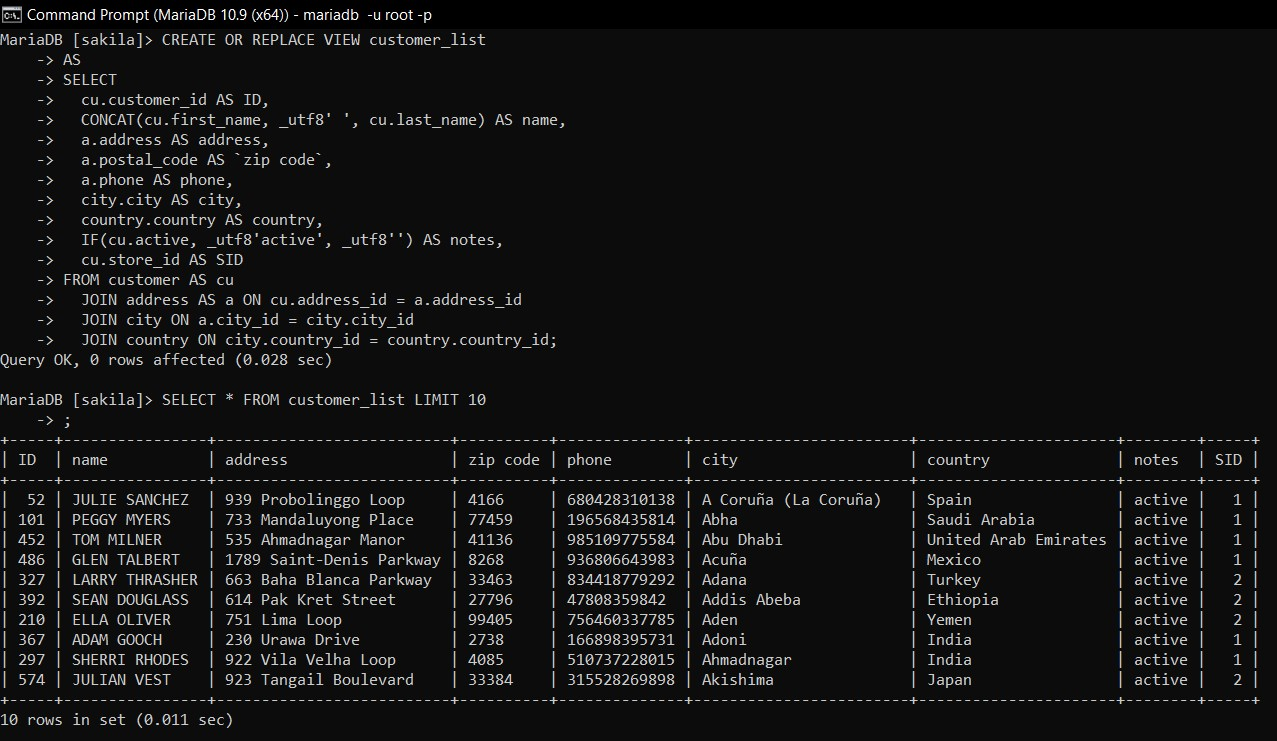

* Se crea o reemplaza la vista film_list, que es una lista de las películas, la cual une las tablas category con film mediante su entidad debil film_category, y film con actor mediante su entidad debil film_actor.

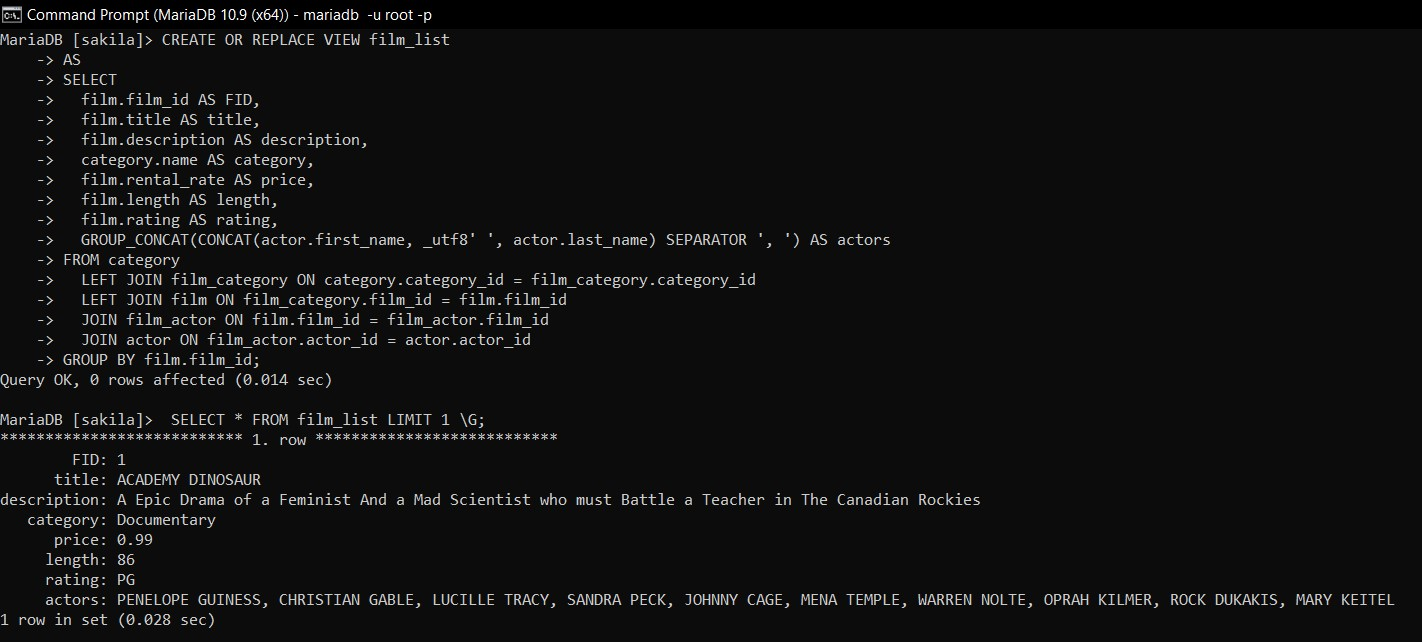

* Se crea o reemplaza la vista nicer_but_slower_film_list, que muestra lo mismo que la vista anterior mediante las mismas uniones, sin embargo en este caso para los nombres de los actores se define el atributo de otra manera. 

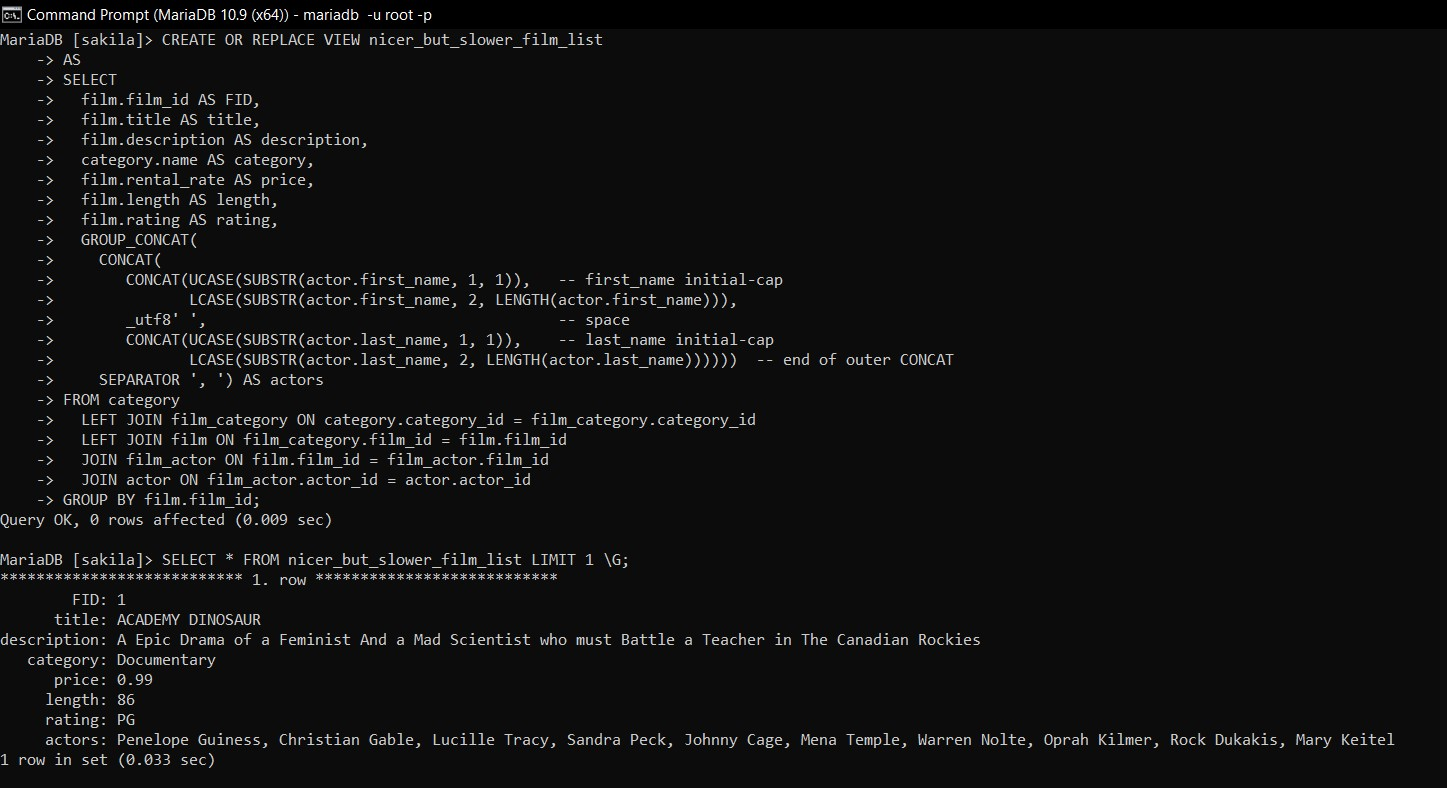

* Se crea o reemplaza la vista sales_by_store, que muestra las ventas totales por tienda, esto mediante la intersección entre las tablas payment, rental, inventory, store, address, city, country y staff. Los registros se encuentran ordenados alfabéticamente por el país y ciudad de la tienda.

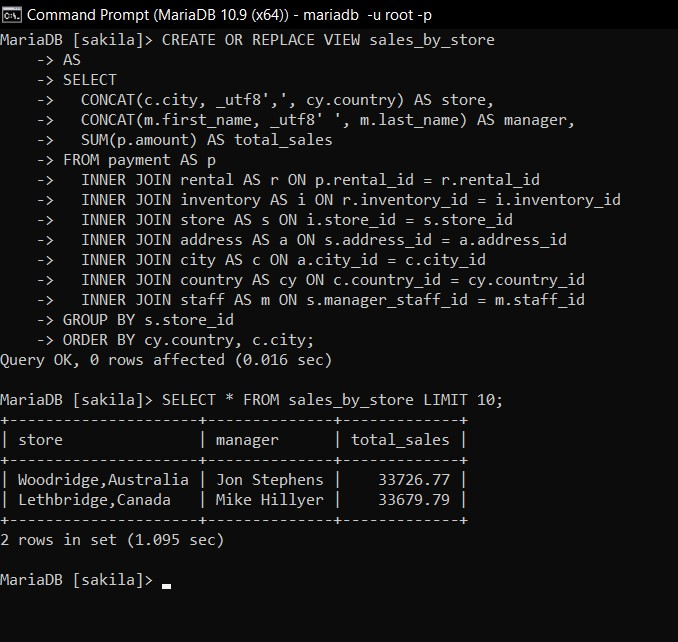

* Se crea o reemplaza la vista sales_by_film_category, que muestra una lista de categorías de películas con sus respectivas ventas totales, esto mediante la intersección entre las tablas payment, rental, inventory, film, film_category y category. 

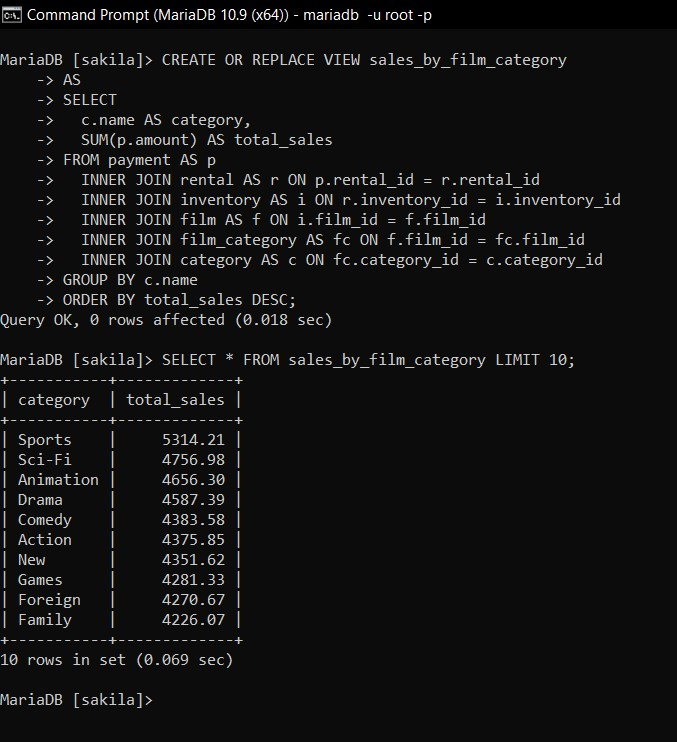

* Secrea o reemplaza la vista actor_info, que da una lista de la imformación de los actores, esto mediante las tablas actor, film_actor, film_category y category. Sin embargo en este caso se ejecuta con los privilegios del usuario que lo invoca, uno mismo, en vez del definer.

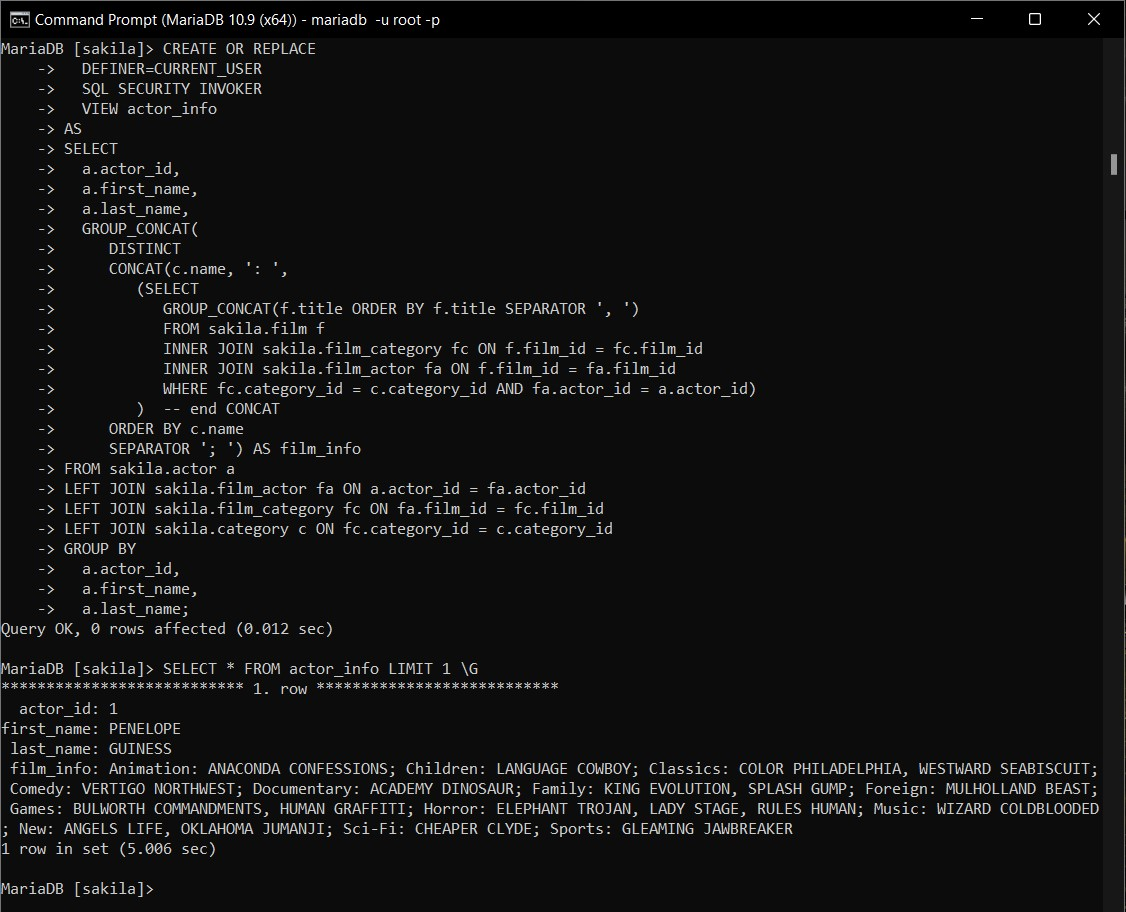

8. Instale sqlalchemy. Siga las instrucciones del cuaderno de Jupyter lab 

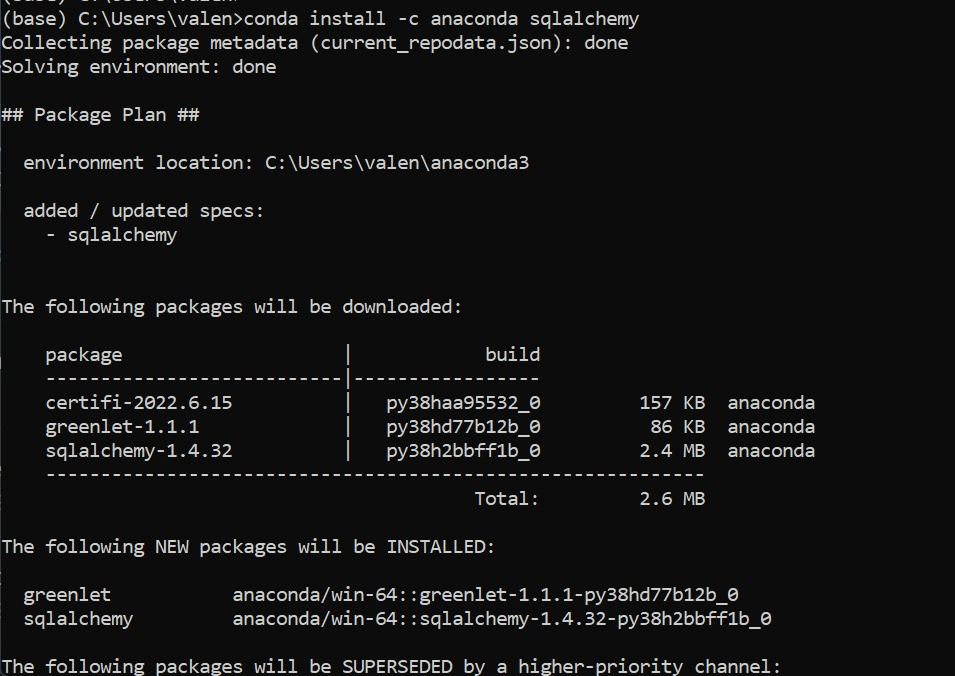

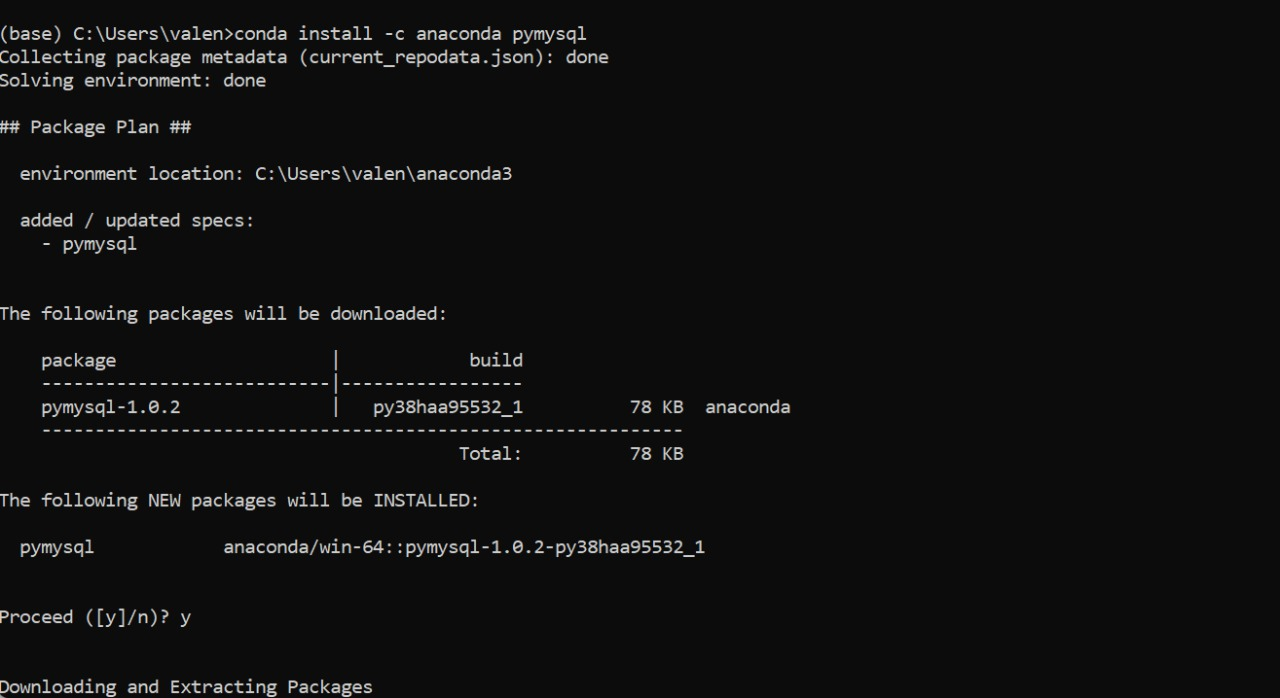

9. Configure la conexión a su base de datos desde Jupyer Lab. Siga las instrucciones del cuaderno de Jupyter lab

In [1]:
import sqlalchemy
#import mysqlclient
import pymysql
sqlalchemy.__version__  

'1.4.32'

In [3]:
from sqlalchemy import create_engine

In [4]:
#from sqlalchemy import create_engine
def connect_db():
    # MySQL user: root, password:, port:, database:
    print("Start connecting to the database")
    sql_user = input("user:") # root
    sql_passwd = input("mysql password:") #46821631:vA
    sql_host = input("host:") # 127.0.0.1
    sql_port = int(input("port:")) # 3306
    sql_db = input("db:") # sakila
    
    connection_string = 'mysql+pymysql://%s:%s@%s:%d/%s' % (sql_user, sql_passwd, sql_host, sql_port, sql_db) 
    
    engine = create_engine(connection_string)
    print("%s database connection succeeded" % sql_db)
    
    return engine, connection_string

engine, connection_string = connect_db() 


Start connecting to the database


user: root
mysql password: Ariadna1312
host: 127.0.0.1
port: 3306
db: sakila


sakila database connection succeeded


10. Hagas las consultas de antes, pero ahora súbalas a Pandas. Siga las instrucciones del cuaderno de Jupyter lab

In [13]:
import pandas as pd

In [36]:
query1 = "SELECT  s.staff_id AS ID, \
CONCAT(s.first_name, _utf8' ', s.last_name) AS name, \
a.address AS address, \
a.postal_code AS `zip code`, \
a.phone AS phone, \
city.city AS city, \
country.country AS country, \
s.store_id AS SID \
FROM    staff AS s \
JOIN    address AS a ON s.address_id = a.address_id \
JOIN    city ON a.city_id = city.city_id \
JOIN    country ON city.country_id = country.country_id;"

df1 = pd.read_sql(query1, engine)
df1

,ID,name,address,zip code,phone,city,country,SID
0,1,Mike Hillyer,23 Workhaven Lane,,14033335568,Lethbridge,Canada,1
1,2,Jon Stephens,1411 Lillydale Drive,,6172235589,Woodridge,Australia,2


In [39]:
query2 = "SELECT cu.customer_id AS ID, \
CONCAT(cu.first_name, _utf8' ', cu.last_name) AS name, \
a.address AS address, \
a.postal_code AS `zip code`, \
a.phone AS phone, \
city.city AS city, \
country.country AS country, \
IF(cu.active, _utf8'active', _utf8'') AS notes, \
cu.store_id AS SID \
FROM customer AS cu \
JOIN address AS a ON cu.address_id = a.address_id \
JOIN city ON a.city_id = city.city_id \
JOIN country ON city.country_id = country.country_id;"

df2 = pd.read_sql(query2, engine)
df2

,ID,name,address,zip code,phone,city,country,notes,SID
0,1,MARY SMITH,1913 Hanoi Way,35200,28303384290,Sasebo,Japan,active,1
1,2,PATRICIA JOHNSON,1121 Loja Avenue,17886,838635286649,San Bernardino,United States,active,1
2,3,LINDA WILLIAMS,692 Joliet Street,83579,448477190408,Athenai,Greece,active,1
3,4,BARBARA JONES,1566 Inegl Manor,53561,705814003527,Myingyan,Myanmar,active,2
4,5,ELIZABETH BROWN,53 Idfu Parkway,42399,10655648674,Nantou,Taiwan,active,1
...,...,...,...,...,...,...,...,...,...
594,595,TERRENCE GUNDERSON,844 Bucuresti Place,36603,935952366111,Jinzhou,China,active,1
595,596,ENRIQUE FORSYTHE,1101 Bucuresti Boulevard,97661,199514580428,Patras,Greece,active,1
596,597,FREDDIE DUGGAN,1103 Quilmes Boulevard,52137,644021380889,Sullana,Peru,active,1
597,598,WADE DELVALLE,1331 Usak Boulevard,61960,145308717464,Lausanne,Switzerland,active,1


In [43]:
query3 = "SELECT film.film_id AS FID, \
film.title AS title, \
film.description AS description, \
category.name AS category, \
film.rental_rate AS price, \
film.length AS length, \
film.rating AS rating, \
GROUP_CONCAT(CONCAT(actor.first_name, _utf8' ', actor.last_name) SEPARATOR ', ') AS actors \
FROM category \
LEFT JOIN film_category ON category.category_id = film_category.category_id \
LEFT JOIN film ON film_category.film_id = film.film_id \
JOIN film_actor ON film.film_id = film_actor.film_id \
JOIN actor ON film_actor.actor_id = actor.actor_id \
GROUP BY film.film_id;"

df3 = pd.read_sql(query3, engine)
df3

,FID,title,description,category,price,length,rating,actors
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,Documentary,0.99,86,PG,"PENELOPE GUINESS, CHRISTIAN GABLE, LUCILLE TRA..."
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,Horror,4.99,48,G,"BOB FAWCETT, MINNIE ZELLWEGER, SEAN GUINESS, C..."
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,Documentary,2.99,50,NC-17,"NICK WAHLBERG, BOB FAWCETT, CAMERON STREEP, RA..."
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,Horror,2.99,117,G,"JODIE DEGENERES, SCARLETT DAMON, KENNETH PESCI..."
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,Family,2.99,130,G,"GARY PHOENIX, DUSTIN TAUTOU, MATTHEW LEIGH, MA..."
...,...,...,...,...,...,...,...,...
992,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,Documentary,0.99,183,G,"ED CHASE, JULIA MCQUEEN, JAMES PITT, CHRISTOPH..."
993,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,Music,0.99,179,NC-17,"SANDRA KILMER, VAL BOLGER, SCARLETT BENING, IA..."
994,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,Horror,0.99,105,NC-17,"UMA WOOD, NICK STALLONE, GARY PENN, SALMA NOLT..."
995,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,Children,2.99,101,R,"CARMEN HUNT, MARY TANDY, PENELOPE CRONYN, WHOO..."


In [48]:
query4="SELECT film.film_id AS FID, \
film.title AS title, \
film.description AS description, \
category.name AS category, \
film.rental_rate AS price, \
film.length AS length, \
film.rating AS rating, \
GROUP_CONCAT( \
CONCAT( \
CONCAT(UCASE(SUBSTR(actor.first_name, 1, 1)), \
LCASE(SUBSTR(actor.first_name, 2, LENGTH(actor.first_name))), \
_utf8' ', \
CONCAT(UCASE(SUBSTR(actor.last_name, 1, 1)), \
LCASE(SUBSTR(actor.last_name, 2, LENGTH(actor.last_name)))))) \
SEPARATOR ', ') AS actors \
FROM category  \
LEFT JOIN film_category ON category.category_id = film_category.category_id  \
LEFT JOIN film ON film_category.film_id = film.film_id \
JOIN film_actor ON film.film_id = film_actor.film_id \
JOIN actor ON film_actor.actor_id = actor.actor_id \
GROUP BY film.film_id;"

df4 = pd.read_sql(query4, engine)
df4

,FID,title,description,category,price,length,rating,actors
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,Documentary,0.99,86,PG,"Penelope Guiness, Christian Gable, Lucille Tra..."
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,Horror,4.99,48,G,"Bob Fawcett, Minnie Zellweger, Sean Guiness, C..."
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,Documentary,2.99,50,NC-17,"Nick Wahlberg, Bob Fawcett, Cameron Streep, Ra..."
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,Horror,2.99,117,G,"Jodie Degeneres, Scarlett Damon, Kenneth Pesci..."
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,Family,2.99,130,G,"Gary Phoenix, Dustin Tautou, Matthew Leigh, Ma..."
...,...,...,...,...,...,...,...,...
992,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,Documentary,0.99,183,G,"Ed Chase, Julia Mcqueen, James Pitt, Christoph..."
993,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,Music,0.99,179,NC-17,"Sandra Kilmer, Val Bolger, Scarlett Bening, Ia..."
994,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,Horror,0.99,105,NC-17,"Uma Wood, Nick Stallone, Gary Penn, Salma Nolt..."
995,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,Children,2.99,101,R,"Carmen Hunt, Mary Tandy, Penelope Cronyn, Whoo..."


In [49]:
query5='''SELECT
CONCAT(c.city, _utf8',', cy.country) AS store,
CONCAT(m.first_name, _utf8' ', m.last_name) AS manager,
SUM(p.amount) AS total_sales
FROM payment AS p
INNER JOIN rental AS r ON p.rental_id = r.rental_id
INNER JOIN inventory AS i ON r.inventory_id = i.inventory_id
INNER JOIN store AS s ON i.store_id = s.store_id
INNER JOIN address AS a ON s.address_id = a.address_id
INNER JOIN city AS c ON a.city_id = c.city_id
INNER JOIN country AS cy ON c.country_id = cy.country_id
INNER JOIN staff AS m ON s.manager_staff_id = m.staff_id
GROUP BY s.store_id
ORDER BY cy.country, c.city;'''

df5 = pd.read_sql(query5, engine)
df5

,store,manager,total_sales
0,"Woodridge,Australia",Jon Stephens,33726.77
1,"Lethbridge,Canada",Mike Hillyer,33679.79


In [50]:
query6='''SELECT
  c.name AS category,
  SUM(p.amount) AS total_sales
FROM payment AS p
  INNER JOIN rental AS r ON p.rental_id = r.rental_id
  INNER JOIN inventory AS i ON r.inventory_id = i.inventory_id
  INNER JOIN film AS f ON i.film_id = f.film_id
  INNER JOIN film_category AS fc ON f.film_id = fc.film_id
  INNER JOIN category AS c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY total_sales DESC;'''

df6 = pd.read_sql(query6, engine)
df6

,category,total_sales
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


In [58]:
query7='''SELECT a.actor_id,
  a.first_name,
  a.last_name,
  GROUP_CONCAT(
     DISTINCT
     CONCAT(c.name, ': ',
        (SELECT 
           GROUP_CONCAT(f.title ORDER BY f.title SEPARATOR ', ')
           FROM sakila.film f
           INNER JOIN sakila.film_category fc ON f.film_id = fc.film_id
           INNER JOIN sakila.film_actor fa ON f.film_id = fa.film_id
           WHERE fc.category_id = c.category_id AND fa.actor_id = a.actor_id)
        )  
     ORDER BY c.name
     SEPARATOR '; ') AS film_info
FROM sakila.actor as a
LEFT JOIN sakila.film_actor fa ON a.actor_id = fa.actor_id
LEFT JOIN sakila.film_category fc ON fa.film_id = fc.film_id
LEFT JOIN sakila.category c ON fc.category_id = c.category_id
GROUP BY
  a.actor_id,
  a.first_name,
  a.last_name;'''

df7 = pd.read_sql(query7, engine)
df7

pandas.core.frame.DataFrame

### Conclusiones

* El paquete de sqlalchemy permite desarrollar todas la consultas realizadas en la consola de MariaDB, lo cual es muy útil para ejecutar el lenguaje de sql desde python y en este caso cuadernos de jupyter.

* Además del paquete de sqlalchemy también es muy necesario el paquete pymysql para poder leer de manera idónea los códigos.

* Desde la función read_sql de pandas no se pueden usar los comandos CREATE o REPLACE ya que el comando da un objeto DataFrame, entonces la función espera recibir una consulta realizada con el lenguaje sql que automáticamente se convierte en una tabla.